In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [8]:
# Create the universe of discourse for temperature
temperature_range = np.arange(0, 41, 1)

# Crisp input before fuzzification
temperature = ctrl.Antecedent(temperature_range, 'temperature')

# Create the universe for the AC power
ac_power_range = np.arange(0, 101, 1)

# Crisp output after defuzzification
ac_power = ctrl.Consequent(ac_power_range, 'ac_power')

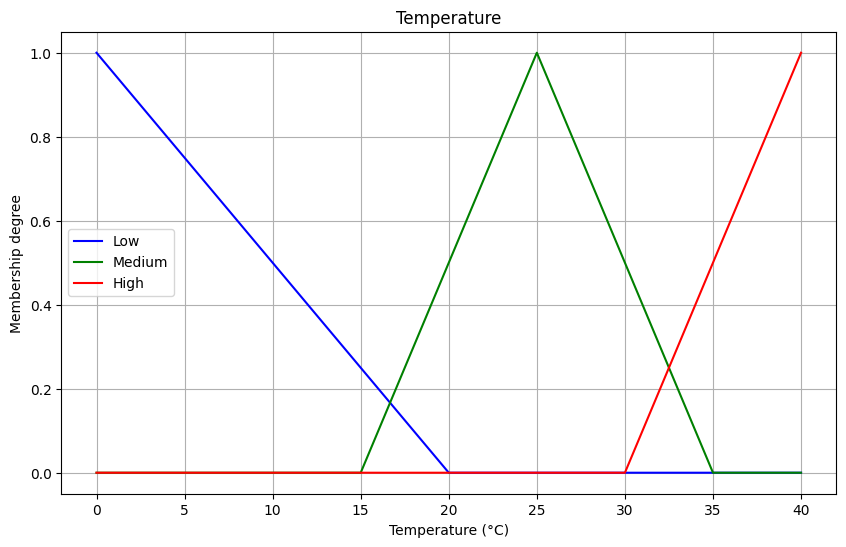

In [9]:
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['medium'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 40, 40])


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(temperature_range, fuzz.trimf(temperature_range, [0, 0, 20]), 'b', linewidth=1.5, label='Low')
plt.plot(temperature_range, fuzz.trimf(temperature_range, [15, 25, 35]), 'g', linewidth=1.5, label='Medium')
plt.plot(temperature_range, fuzz.trimf(temperature_range, [30, 40, 40]), 'r', linewidth=1.5, label='High')
plt.title('Temperature')
plt.ylabel('Membership degree')
plt.xlabel('Temperature (°C)')

plt.legend()
plt.grid(True)
plt.show()


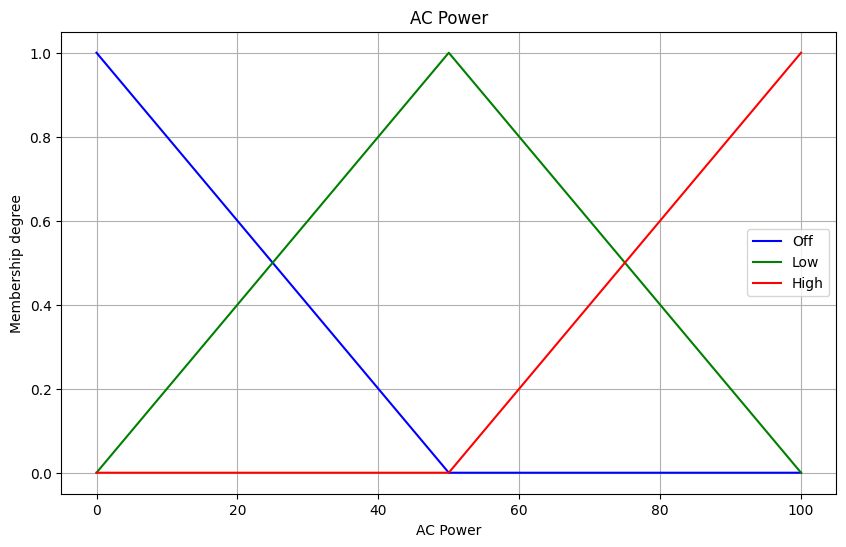

In [23]:
# Define the membership functions for AC power
ac_power['off'] = fuzz.trimf(ac_power.universe, [0, 0, 50])
ac_power['low'] = fuzz.trimf(ac_power.universe, [0, 50, 100])
ac_power['high'] = fuzz.trimf(ac_power.universe, [50, 100, 100])

# plotting the membership functions
plt.figure(figsize=(10, 6))

plt.plot(ac_power_range, fuzz.trimf(ac_power_range, [0, 0, 50]), 'b', linewidth=1.5, label='Off')
plt.plot(ac_power_range, fuzz.trimf(ac_power_range, [0, 50, 100]), 'g', linewidth=1.5, label='Low')
plt.plot(ac_power_range, fuzz.trimf(ac_power_range, [50, 100, 100]), 'r', linewidth=1.5, label='High')

plt.title("AC Power")
plt.ylabel("Membership degree")
plt.xlabel("AC Power")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Define the rules
rule1 = ctrl.Rule(temperature['low'], ac_power['off'])
rule2 = ctrl.Rule(temperature['medium'], ac_power['low'])
rule3 = ctrl.Rule(temperature['high'], ac_power['high'])

rule1, rule2, rule3

(IF temperature[low] THEN ac_power[off]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF temperature[medium] THEN ac_power[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF temperature[high] THEN ac_power[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax)

In [13]:
# Create the control system and simulation
ac_control_system = ctrl.ControlSystem([rule1, rule2, rule3])
ac_simulation = ctrl.ControlSystemSimulation(ac_control_system)

In [16]:
# Function to test the system with different temperature values
def test_ac_system(temp_value):
    ac_simulation.input['temperature'] = temp_value
    ac_simulation.compute()
    return ac_simulation.output['ac_power']

# Test the system
test_values = [10, 20, 25, 30, 35]
results = {val: test_ac_system(val) for val in test_values}
results

{10: 19.444444444444443,
 20: 50.0,
 25: 50.000000000000014,
 30: 50.0,
 35: 80.55555555555556}

In [21]:
import pandas as pd
from IPython.display import display

In [22]:
# Display the results in a DataFrame
df_results = pd.DataFrame(list(results.items()), columns=['Temperature', 'AC Power'])
display(df_results)

,Temperature,AC Power
0,10,19.444444
1,20,50.000000
2,25,50.000000
3,30,50.000000
4,35,80.555556
